<a href="https://colab.research.google.com/github/navyakarna/NLP_PROJECT_DISASTER-MANAGEMENT/blob/main/DEPTH_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython import get_ipython
from IPython.display import display
# %%
!pip install timm
!pip install opencv-python
!pip install PyYAML

# Install midas package using git clone and pip install -e
!git clone https://github.com/intel-isl/MiDaS.git
%cd MiDaS
!pip install -e .
import torch
import cv2
from matplotlib import pyplot as plt
from midas.dpt_depth import DPTDepthModel
from midas.transforms import Resize, NormalizeImage, PrepareForNet
import numpy as np # Import numpy

# Load the MiDaS model (ensure you have the model weights downloaded)
model = DPTDepthModel(path_to_model_weights="midas_model_weights.pth")
model.eval()

# Load image
image = cv2.imread("/content/handbag.png")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Prepare image for the network
transform = Resize(
    384, 384,


)
# Pass the image as a dictionary with "image" key
# Create a dummy mask with the same shape as the image
# and fill it with zeros if you don't have a real mask.
dummy_mask = np.zeros_like(image_rgb, dtype=np.float32)
image_input = transform({"image": image_rgb, "mask": dummy_mask})
# Provide mean and std values for image normalization.
# These values are commonly used for ImageNet-trained models.
# You can adjust these values based on your dataset or model.
image_input = NormalizeImage(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])(image_input)
image_input = PrepareForNet()(image_input)

# Run depth estimation
with torch.no_grad():
    # Access the 'image' tensor from the dictionary
    # Convert the image to a PyTorch tensor and move it to the same device as the model
    # Assuming the model is on the CPU, if it's on GPU, use .cuda() instead of .cpu()
    depth_map = model.forward(torch.from_numpy(image_input['image']).unsqueeze(0).cpu())

# Visualize the depth map
plt.imshow(depth_map.squeeze().cpu().numpy(), cmap='plasma')
plt.show()

Cloning into 'MiDaS'...
remote: Enumerating objects: 622, done.
remote: Counting objects: 100% (247/247), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 622 (delta 183), reused 139 (delta 137), pack-reused 375 (from 1)
Receiving objects: 100% (622/622), 3.44 MiB | 4.78 MiB/s, done.
Resolving deltas: 100% (246/246), done.
/content/MiDaS
Obtaining file:///content/MiDaS
ERROR: file:///content/MiDaS does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


/usr/local/lib/python3.10/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.10/dist-packages/timm/models/_factory.py:117: UserWarning: Mapping deprecated model name vit_base_resnet50_384 to current vit_base_r50_s16_384.orig_in21k_ft_in1k.
  model = create_fn(


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
import torch
from pytorch3d.renderer import MeshRenderer, MeshRasterizer, SoftPhongShader, PointLights, RasterizationSettings
from pytorch3d.structures import Pointclouds
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a depth map, we'll simulate it here (replace with actual depth map)
depth_map = np.random.rand(256, 256)

# Generate 3D points from depth map (simplified)
height, width = depth_map.shape
x, y = np.meshgrid(np.arange(width), np.arange(height))
z = depth_map

# Stack to get 3D points
points_3d = np.stack([x, y, z], axis=-1).reshape(-1, 3)

# Convert to PyTorch tensor
points_3d_tensor = torch.tensor(points_3d, dtype=torch.float32)

# Create a point cloud object
point_cloud = Pointclouds(points=[points_3d_tensor])

# Set up the renderer
lights = PointLights(device="cpu", location=[[0.0, 0.0, -3.0]])
# Create RasterizationSettings object with image_size
raster_settings = RasterizationSettings(image_size=256)
# Pass RasterizationSettings to MeshRasterizer
rasterizer = MeshRasterizer(raster_settings=raster_settings)
shader = SoftPhongShader(device="cpu", lights=lights)
renderer = MeshRenderer(rasterizer=rasterizer, shader=shader)

# Visualize the point cloud (you can replace this with actual 3D meshes or other visualizations)
plt.imshow(depth_map, cmap='plasma')
plt.show()

ModuleNotFoundError: No module named 'pytorch3d'

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) y
Token is valid (permission: fineG

In [ ]:
from PIL import Image

# Function to resize the image
def resize_image(image_path, output_path, size=(384, 384)):
    """
    Resizes the image to the specified size and saves it.

    Args:
        image_path (str): Path to the input image.
        output_path (str): Path to save the resized image.
        size (tuple): Desired output size (width, height).
    """
    image = Image.open(image_path).convert("RGB")
    resized_image = image.resize(size)
    resized_image.save(output_path)
    print(f"Image resized and saved to {output_path}")

# Example Usage
input_image_path = "/content/Screenshot 2024-12-19 at 10.07.21 PM.png"  # Replace with your input image path
output_resized_image_path = "resized_image.png"  # Replace with desired output path
resize_image(input_image_path, output_resized_image_path)


Image resized and saved to resized_image.png


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


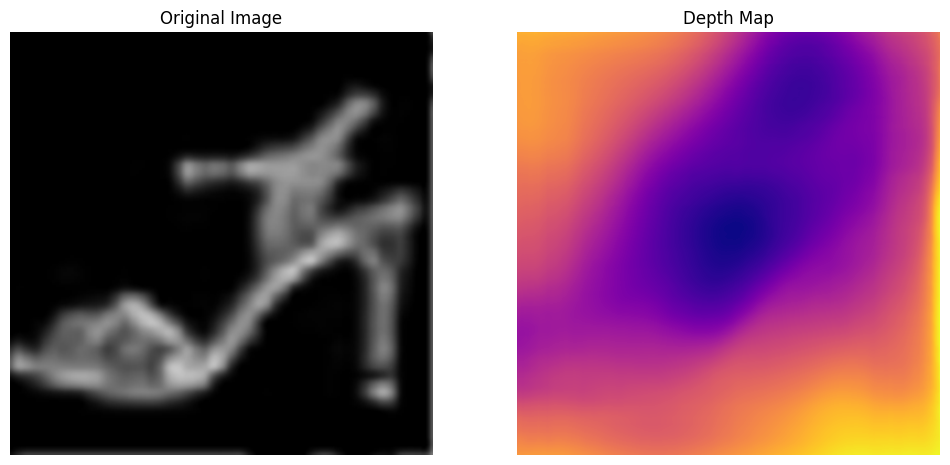

In [ ]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms

# Step 1: Download and Load the DPT Depth Estimation Model
def load_dpt_model():
    """
    Load the DPT model for depth estimation directly from PyTorch's model zoo.
    """
    model = torch.hub.load("intel-isl/MiDaS", "DPT_Large")  # Alternatively, use "DPT_Hybrid" for a smaller model
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    return model, device

model, device = load_dpt_model()

# Step 2: Define Transformation for Input Image
def preprocess_image(image_path):
    """
    Preprocess the input image for DPT depth estimation.
    """
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((384, 384)),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    original_size = image.shape[:2][::-1]  # (width, height)
    input_tensor = transform(image).unsqueeze(0).to(device)
    return input_tensor, original_size

# Provide your image path
image_path = "/content/resized_image.png"  # Replace with your image file
input_tensor, original_size = preprocess_image(image_path)

# Step 3: Perform Depth Estimation
def estimate_depth(model, input_tensor):
    """
    Estimate depth using the DPT model.
    """
    with torch.no_grad():
        depth_map = model(input_tensor)
        depth_map = torch.nn.functional.interpolate(
            depth_map.unsqueeze(1),
            size=original_size[::-1],  # Rescale to original image size
            mode="bicubic",
            align_corners=False,
        ).squeeze().cpu().numpy()
    return depth_map

depth_map = estimate_depth(model, input_tensor)

# Step 4: Normalize the Depth Map for Visualization
depth_map_normalized = (depth_map - depth_map.min()) / (depth_map.max() - depth_map.min())

# Step 5: Visualize Results
def visualize_results(image_path, depth_map):
    """
    Display the original image and its depth map side by side.
    """
    original_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(depth_map, cmap="plasma")
    plt.title("Depth Map")
    plt.axis("off")

    plt.show()

visualize_results(image_path, depth_map_normalized)


In [ ]:
def depth_to_distance(depth, depth_scale=10.0):
  """
  Converts depth values (0-1) to distances in meters.

  Args:
      depth: A NumPy array representing the depth map.
      depth_scale: A scaling factor to convert normalized depth to meters.

  Returns:
      A NumPy array representing the distance map in meters.
  """
  return -1.0 / (depth * depth_scale)

In [ ]:
def generate_point_cloud(depth_map, fx=None, fy=None, cx=None, cy=None):
  """
  Generates a point cloud from the depth map.

  Args:
      depth_map: A NumPy array representing the depth map.
      fx: Focal length of the camera (optional).
      fy: Focal length of the camera (optional).
      cx: Principal point x-coordinate (optional).
      cy: Principal point y-coordinate (optional).

  Returns:
      A NumPy array of shape (N, 3) representing the 3D point cloud.
  """
  height, width = depth_map.shape

  points = []
  for i in range(height):
      for j in range(width):
          depth = depth_map[i, j]
          if depth > 0.0:  # Skip invalid depths
              X = (j - cx) * depth / fx if fx else j * depth
              Y = (i - cy) * depth / fy if fy else i * depth
              Z = depth
              points.append([X, Y, Z])

  return np.array(points)



In [ ]:
import torch
import cv2
import numpy as np
from torchvision import transforms
import matplotlib.pyplot as plt
import torch
import cv2
import numpy as np
from torchvision import transforms
import open3d as o3d

# ... (Depth Estimation code from the previous response) ...

# --- Point Cloud Generation ---

def generate_point_cloud(depth_map, fx, fy, cx, cy):

# Load the DPT Depth Estimation Model
def load_dpt_model():
    """
    Load the DPT model for depth estimation directly from PyTorch's model zoo.
    """
    model = torch.hub.load("intel-isl/MiDaS", "DPT_Large")  # Alternatively, use "DPT_Hybrid" for a smaller model
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    return model, device

model, device = load_dpt_model()

# Define Transformation for Input Image
def preprocess_image(image_path):
    """
    Preprocess the input image for DPT depth estimation.
    """
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((384, 384)),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = transform(image).unsqueeze(0).to(device)
    return image

# Load and preprocess the image
image_path = "/content/066A1C9D-56F4-407B-8710-3738E40A6B64.jpeg"  # Replace with the actual image path
input_image = preprocess_image(image_path)

# Perform depth estimation
with torch.no_grad():
    prediction = model(input_image)

# Post-process the depth map
prediction = torch.nn.functional.interpolate(
    prediction.unsqueeze(1),
    size=input_image.shape[2:],
    mode="bilinear",
    align_corners=False
).squeeze()

# Normalize the depth map
prediction = torch.sigmoid(prediction)

# Convert to numpy array
depth_map = prediction.cpu().numpy()

# Visualize the depth map
plt.imshow(depth_map, cmap='viridis')
plt.colorbar()
plt.show()

# --- Point Cloud Generation (Optional) ---

# Assuming a simple depth-to-distance conversion
def depth_to_distance(depth, depth_scale=10.0):
    """
    Converts depth values (0-1) to distances in meters.

    Args:
      depth: A NumPy array representing the depth map.
      depth_scale: A scaling factor to convert normalized depth to meters.

    Returns:
      A NumPy array representing the distance map in meters.
    """
    return -1.0 / (depth * depth_scale)

# Generate point cloud (without camera intrinsics)
distance_map = depth_to_distance(depth_map)
# ... (Generate point cloud using distance_map as shown in the previous response)

IndentationError: expected an indented block after function definition on line 16 (<ipython-input-9-d891fc4b381e>, line 19)

In [ ]:
import torch
import cv2
import numpy as np
from torchvision import transforms
import open3d as o3d
import torch
import cv2
import numpy as np
from torchvision import transforms
from timm.layers import *  # Import from timm.layers
import open3d as o3d

# Load the DPT Depth Estimation Model
def load_dpt_model():
    """
    Load the DPT model for depth estimation directly from PyTorch's model zoo.
    """
    model = torch.hub.load("intel-isl/MiDaS", "DPT_Large")  # Alternatively, use "DPT_Hybrid" for a smaller model
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    return model, device

model, device = load_dpt_model()

# Define Transformation for Input Image
def preprocess_image(image_path):
    """
    Preprocess the input image for DPT depth estimation.
    """
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((384, 384)),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = transform(image).unsqueeze(0).to(device)
    return image

# Load and preprocess the image
image_path = "/content/066A1C9D-56F4-407B-8710-3738E40A6B64.jpeg"  # Replace with the actual image path
input_image = preprocess_image(image_path)

# Perform depth estimation
with torch.no_grad():
    prediction = model(input_image)

# Post-process the depth map
prediction = torch.nn.functional.interpolate(
    prediction.unsqueeze(1),
    size=input_image.shape[2:],
    mode="bilinear",
    align_corners=False
).squeeze()

# Normalize the depth map
prediction = torch.sigmoid(prediction)

# Convert to numpy array
depth_map = prediction.cpu().numpy()

# --- Point Cloud Generation ---

def generate_point_cloud(depth_map, fx, fy, cx, cy):
    """
    Generates a point cloud from the depth map.

    Args:
      depth_map: A NumPy array representing the depth map.
      fx: Focal length in the x-direction.
      fy: Focal length in the y-direction.
      cx: Principal point x-coordinate.
      cy: Principal point y-coordinate.

    Returns:
      A NumPy array of shape (N, 3) representing the 3D point cloud.
    """
    height, width = depth_map.shape
    x, y = np.meshgrid(np.arange(width), np.arange(height))
    x = (x - cx) / fx
    y = (y - cy) / fy
    z = depth_map

    x = x * z
    y = y * z

    points = np.stack((x, y, z), axis=2)
    points = points.reshape(-1, 3)

    return points

# Example Camera Intrinsics (replace with your actual values)
fx = 500.0
fy = 500.0
height, width = depth_map.shape
cx = width / 2
cy = height / 2

# Convert depth to distance
depth_scale = 10.0  # Adjust as needed
distance_map = -1.0 / (depth_map * depth_scale)

# Generate point cloud
point_cloud = generate_point_cloud(distance_map, fx, fy, cx, cy)

# Create Open3D point cloud
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(point_cloud)

# Visualize point cloud
o3d.visualization.draw_geometries([pcd])

try:
    # Create Open3D point cloud
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(point_cloud)

    # Visualize point cloud
    o3d.visualization.draw_geometries([pcd])

except Exception as e:
    print(f"Error visualizing point cloud: {e}")
    print("Check DISPLAY environment variable and Open3D installation.")

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


[Open3D WARNING] GLFW Error: X11: The DISPLAY environment variable is missing
[Open3D WARNING] Failed to initialize GLFW
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.
[Open3D WARNING] GLFW Error: X11: The DISPLAY environment variable is missing
[Open3D WARNING] Failed to initialize GLFW
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


In [ ]:
# Install Xvfb
!sudo apt-get update
!sudo apt-get install xvfb

# Start Xvfb
!Xvfb :1 -screen 0 1280x1024x24 &

# Export DISPLAY
%env DISPLAY=:1
!sudo apt-get update
!sudo apt-get install xvfb

# Start Xvfb
!Xvfb :1 -screen 0 1280x1024x24 &

# Install Xvfb
!sudo apt-get update
!sudo apt-get install xvfb

# Start Xvfb
!Xvfb :1 -screen 0 1280x1024x24 &

# Export DISPLAY
%env DISPLAY=:1
!sudo apt-get update
!sudo apt-get install xvfb

# Start Xvfb
!Xvfb :1 -screen 0 1280x1024x24 &

# Export DISPLAY
%env DISPLAY=:1
import os
os.environ["DISPLAY"] = ":1"

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,632 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,436 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd

In [ ]:
pip install numpy open3d opencv-python matplotlib


In [ ]:
import numpy as np
import open3d as o3d

# Step 1: Load Depth Map and Original Image
def load_depth_and_image(depth_map, image_path):
    """
    Load the depth map and the original image.
    Args:
        depth_map (numpy.ndarray): Depth map generated from the depth estimation model.
        image_path (str): Path to the original RGB image.
    Returns:
        depth_map (numpy.ndarray): Depth map.
        rgb_image (numpy.ndarray): Original RGB image.
    """
    rgb_image = cv2.imread(image_path)
    rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)
    return depth_map, rgb_image

depth_map, rgb_image = load_depth_and_image(depth_map_normalized, image_path)

# Step 2: Generate Point Cloud
def generate_point_cloud(depth_map, rgb_image, focal_length=1.0):
    """
    Generate a 3D point cloud from the depth map and RGB image.
    Args:
        depth_map (numpy.ndarray): Normalized depth map.
        rgb_image (numpy.ndarray): Original RGB image.
        focal_length (float): Focal length of the camera (arbitrary scaling factor).
    Returns:
        points (numpy.ndarray): 3D points (x, y, z).
        colors (numpy.ndarray): Corresponding RGB colors.
    """
    h, w = depth_map.shape
    i, j = np.meshgrid(np.arange(w), np.arange(h), indexing="xy")

    z = depth_map
    x = (i - w / 2) * z / focal_length
    y = (j - h / 2) * z / focal_length

    points = np.stack((x, y, z), axis=-1).reshape(-1, 3)
    colors = rgb_image.reshape(-1, 3) / 255.0  # Normalize RGB to 0-1 range

    return points, colors

points, colors = generate_point_cloud(depth_map, rgb_image)

# Step 3: Save Point Cloud to File
def save_point_cloud(points, colors, output_file="point_cloud.ply"):
    """
    Save the point cloud as a PLY file.
    Args:
        points (numpy.ndarray): 3D points.
        colors (numpy.ndarray): Corresponding RGB colors.
        output_file (str): Output file name.
    """
    point_cloud = o3d.geometry.PointCloud()
    point_cloud.points = o3d.utility.Vector3dVector(points)
    point_cloud.colors = o3d.utility.Vector3dVector(colors)
    o3d.io.write_point_cloud(output_file, point_cloud)
    print(f"Point cloud saved to {output_file}")

save_point_cloud(points, colors)

# Step 4: Visualize Point Cloud (Optional)
def visualize_point_cloud(points, colors):
    """
    Visualize the 3D point cloud using Open3D.
    Args:
        points (numpy.ndarray): 3D points.
        colors (numpy.ndarray): Corresponding RGB colors.
    """
    point_cloud = o3d.geometry.PointCloud()
    point_cloud.points = o3d.utility.Vector3dVector(points)
    point_cloud.colors = o3d.utility.Vector3dVector(colors)
    o3d.visualization.draw_geometries([point_cloud])

visualize_point_cloud(points, colors)


Point cloud saved to point_cloud.ply
[Open3D WARNING] GLFW Error: X11: The DISPLAY environment variable is missing
[Open3D WARNING] Failed to initialize GLFW
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


In [ ]:
save_point_cloud(points, colors, output_file="point_cloud.ply")
print("Point cloud saved successfully.")


Point cloud saved to point_cloud.ply
Point cloud saved successfully.


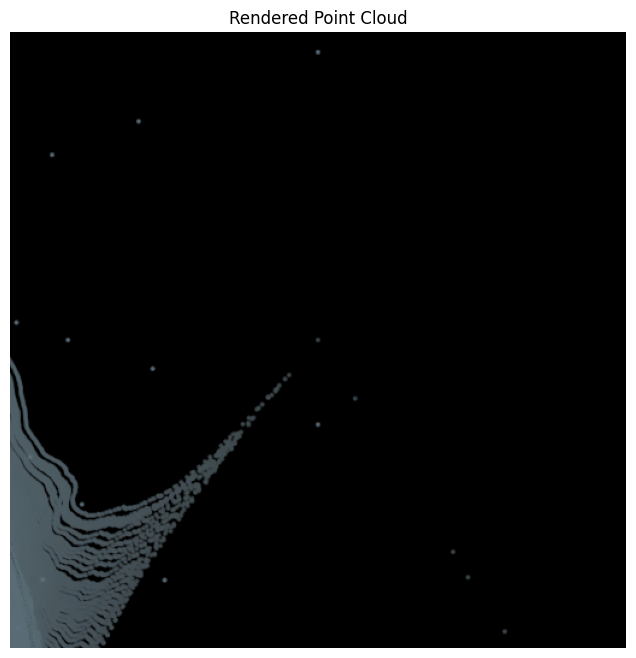

In [ ]:
import os
import sys
import torch
import subprocess
need_pytorch3d=False
try:
    import pytorch3d
except ModuleNotFoundError:
    need_pytorch3d=True
if need_pytorch3d:
    pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
    version_str="".join([
        f"py3{sys.version_info.minor}_cu",
        torch.version.cuda.replace(".",""),
        f"_pyt{pyt_version_str}"
    ])
    !pip install iopath
    if sys.platform.startswith("linux"):
        print("Trying to install wheel for PyTorch3D")
        !pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html
        pip_list = !pip freeze
        need_pytorch3d = not any(i.startswith("pytorch3d==") for  i in pip_list)
    if need_pytorch3d:
        print(f"failed to find/install wheel for {version_str}")
if need_pytorch3d:
    print("Installing PyTorch3D from source")
    !pip install ninja
    !pip install 'git+https://github.com/facebookresearch/pytorch3d.git@stable'

import torch
import numpy as np
import matplotlib.pyplot as plt
from pytorch3d.structures import Pointclouds
from pytorch3d.renderer import (
    FoVPerspectiveCameras,
    look_at_view_transform,
    PointsRasterizationSettings,
    PointsRenderer,
    PointsRasterizer,
    AlphaCompositor,
)

# Step 1: Use the existing `points` and `colors` generated earlier
# Ensure `points` is (N, 3) for 3D coordinates and `colors` is (N, 3) for RGB values

def prepare_pointcloud(points, colors):
    """
    Prepare the point cloud for PyTorch3D rendering.
    Args:
        points (numpy.ndarray): 3D points (N, 3).
        colors (numpy.ndarray): Corresponding RGB colors (N, 3).
    Returns:
        pointcloud (pytorch3d.structures.Pointclouds): PyTorch3D point cloud object.
    """
    points_tensor = torch.tensor(points, dtype=torch.float32)
    colors_tensor = torch.tensor(colors, dtype=torch.float32)
    pointcloud = Pointclouds(points=[points_tensor], features=[colors_tensor])
    return pointcloud

# Prepare the point cloud
pointcloud = prepare_pointcloud(points, colors)

# Step 2: Set up the renderer
def setup_renderer():
    """
    Configure a PyTorch3D renderer for the point cloud.
    Returns:
        renderer (PointsRenderer): Configured PyTorch3D point cloud renderer.
    """
    # Define camera settings
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    R, T = look_at_view_transform(2.0, 10, 45)  # Camera distance, elevation, azimuth
    cameras = FoVPerspectiveCameras(device=device, R=R, T=T)

    # Define rasterization settings
    raster_settings = PointsRasterizationSettings(
        image_size=512,  # Rendered image resolution
        radius=0.01,     # Point size in the rendered image
        points_per_pixel=10  # Blending points per pixel
    )

    # Create rasterizer and renderer
    rasterizer = PointsRasterizer(cameras=cameras, raster_settings=raster_settings)
    renderer = PointsRenderer(
        rasterizer=rasterizer,
        compositor=AlphaCompositor()  # Alpha blending for overlapping points
    )
    return renderer

renderer = setup_renderer()

# Step 3: Render the point cloud
def render_pointcloud(renderer, pointcloud):
    """
    Render the point cloud using PyTorch3D.
    Args:
        renderer (PointsRenderer): PyTorch3D renderer.
        pointcloud (Pointclouds): Prepared PyTorch3D point cloud object.
    Returns:
        rendered_image (numpy.ndarray): Rendered image of the point cloud.
    """
    images = renderer(pointcloud)
    rendered_image = images[0, ..., :3].cpu().numpy()  # Extract RGB
    return rendered_image

rendered_image = render_pointcloud(renderer, pointcloud)

# Step 4: Visualize the rendered image
def visualize_rendered_image(image):
    """
    Visualize the rendered point cloud image.
    Args:
        image (numpy.ndarray): Rendered image (H, W, 3).
    """
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis("off")
    plt.title("Rendered Point Cloud")
    plt.show()

visualize_rendered_image(rendered_image)



In [ ]:
import open3d as o3d

def render_point_cloud(ply_file):
    """
    Render a saved point cloud from a .ply file.
    Args:
        ply_file (str): Path to the .ply file containing the point cloud.
    """
    # Load the point cloud from the .ply file
    point_cloud = o3d.io.read_point_cloud(ply_file)
    if not point_cloud.is_empty():
        print("Successfully loaded point cloud with", len(point_cloud.points), "points.")
    else:
        print("Error: The point cloud is empty!")

    # Visualize the point cloud
    o3d.visualization.draw_geometries(
        [point_cloud],
        window_name="Point Cloud Visualization",
        width=800,
        height=600,
        left=50,
        top=50,
        point_show_normal=False,
    )

# Specify the .ply file path (replace with your file path if different)
ply_file = "point_cloud.ply"
render_point_cloud(ply_file)


Successfully loaded point cloud with 147456 points.
[Open3D WARNING] GLFW Error: X11: The DISPLAY environment variable is missing
[Open3D WARNING] Failed to initialize GLFW
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


In [ ]:
import open3d as o3d

def save_point_cloud_image(ply_file, output_image="point_cloud_render.png"):
    """
    Save the point cloud visualization as an image (offscreen rendering).
    Args:
        ply_file (str): Path to the .ply file.
        output_image (str): Path to save the rendered image.
    """
    # Load the point cloud
    point_cloud = o3d.io.read_point_cloud(ply_file)

    if not point_cloud.is_empty():
        print(f"Loaded point cloud with {len(point_cloud.points)} points.")
    else:
        print("Error: Point cloud is empty!")
        return

    # Create a visualizer object
    vis = o3d.visualization.Visualizer()
    vis.create_window(visible=False)  # Offscreen rendering

    vis.add_geometry(point_cloud)
    vis.poll_events()
    vis.update_renderer()

    # Save the rendered image
    vis.capture_screen_image(output_image)
    vis.destroy_window()
    print(f"Rendered image saved to {output_image}.")

# Specify your file paths
ply_file = "/content/MiDaS/point_cloud.ply"
output_image = "point_cloud_render.png"

save_point_cloud_image(ply_file, output_image)


In [ ]:
import torch
import cv2
import numpy as np
from torchvision import transforms
from timm.layers import *  # Import from timm.layers
import open3d as o3d

# Load the DPT Depth Estimation Model
def load_dpt_model():
    """
    Load the DPT model for depth estimation directly from PyTorch's model zoo.
    """
    model = torch.hub.load("intel-isl/MiDaS", "DPT_Large")  # Alternatively, use "DPT_Hybrid" for a smaller model
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    return model, device

model, device = load_dpt_model()

# Define Transformation for Input Image
def preprocess_image(image_path):
    """
    Preprocess the input image for DPT depth estimation.
    """
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((384, 384)),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = transform(image).unsqueeze(0).to(device)
    return image

# Load and preprocess the image
image_path = "/content/066A1C9D-56F4-407B-8710-3738E40A6B64.jpeg"  # Replace with the actual image path
input_image = preprocess_image(image_path)

# Perform depth estimation
with torch.no_grad():
    prediction = model(input_image)

# Post-process the depth map
prediction = torch.nn.functional.interpolate(
    prediction.unsqueeze(1),
    size=input_image.shape[2:],
    mode="bilinear",
    align_corners=False
).squeeze()

# Normalize the depth map
prediction = torch.sigmoid(prediction)

# Convert to numpy array
depth_map = prediction.cpu().numpy()

# --- Point Cloud Generation ---

def generate_point_cloud(depth_map, fx, fy, cx, cy):
    """
    Generates a point cloud from the depth map.

    Args:
      depth_map: A NumPy array representing the depth map.
      fx: Focal length in the x-direction.
      fy: Focal length in the y-direction.
      cx: Principal point x-coordinate.
      cy: Principal point y-coordinate.

    Returns:
      A NumPy array of shape (N, 3) representing the 3D point cloud.
    """
    height, width = depth_map.shape
    x, y = np.meshgrid(np.arange(width), np.arange(height))
    x = (x - cx) / fx
    y = (y - cy) / fy
    z = depth_map

    x = x * z
    y = y * z

    points = np.stack((x, y, z), axis=2)
    points = points.reshape(-1, 3)

    return points

# Example Camera Intrinsics (replace with your actual values)
fx = 500.0
fy = 500.0
cx = width / 2
cy = height / 2

# Convert depth to distance
depth_scale = 10.0  # Adjust as needed
distance_map = -1.0 / (depth_map * depth_scale)

# Generate point cloud
point_cloud = generate_point_cloud(distance_map, fx, fy, cx, cy)

# Create Open3D point cloud
try:
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(point_cloud)

    # Visualize point cloud
    o3d.visualization.draw_geometries([pcd])

except Exception as e:
    print(f"Error visualizing point cloud: {e}")
    print("Check DISPLAY environment variable and Open3D installation.")
    print("Consider using Xvfb for remote environments.")

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


[Open3D WARNING] GLFW Error: X11: The DISPLAY environment variable is missing
[Open3D WARNING] Failed to initialize GLFW
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.
